In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### ***Data***

In [23]:
ds=pd.read_csv('parkinsons.csv')
ds

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [24]:
ds.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [25]:
ds.shape

(195, 24)

In [26]:
ds.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [27]:
ds.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [28]:
ds.duplicated().sum()

0

In [29]:
ds.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [30]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [31]:
ds.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [32]:
ds['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [33]:
ds.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [34]:
ds.drop(columns="name",axis=1,inplace=True)

In [35]:
x=ds.drop(columns="status",axis=1)
y=ds['status']

In [36]:
x.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### ***Visualization***

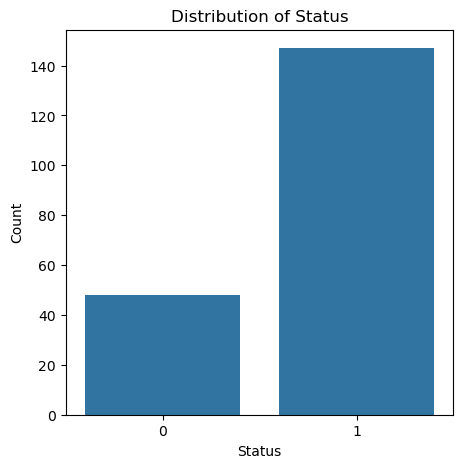

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x='status',data=ds)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

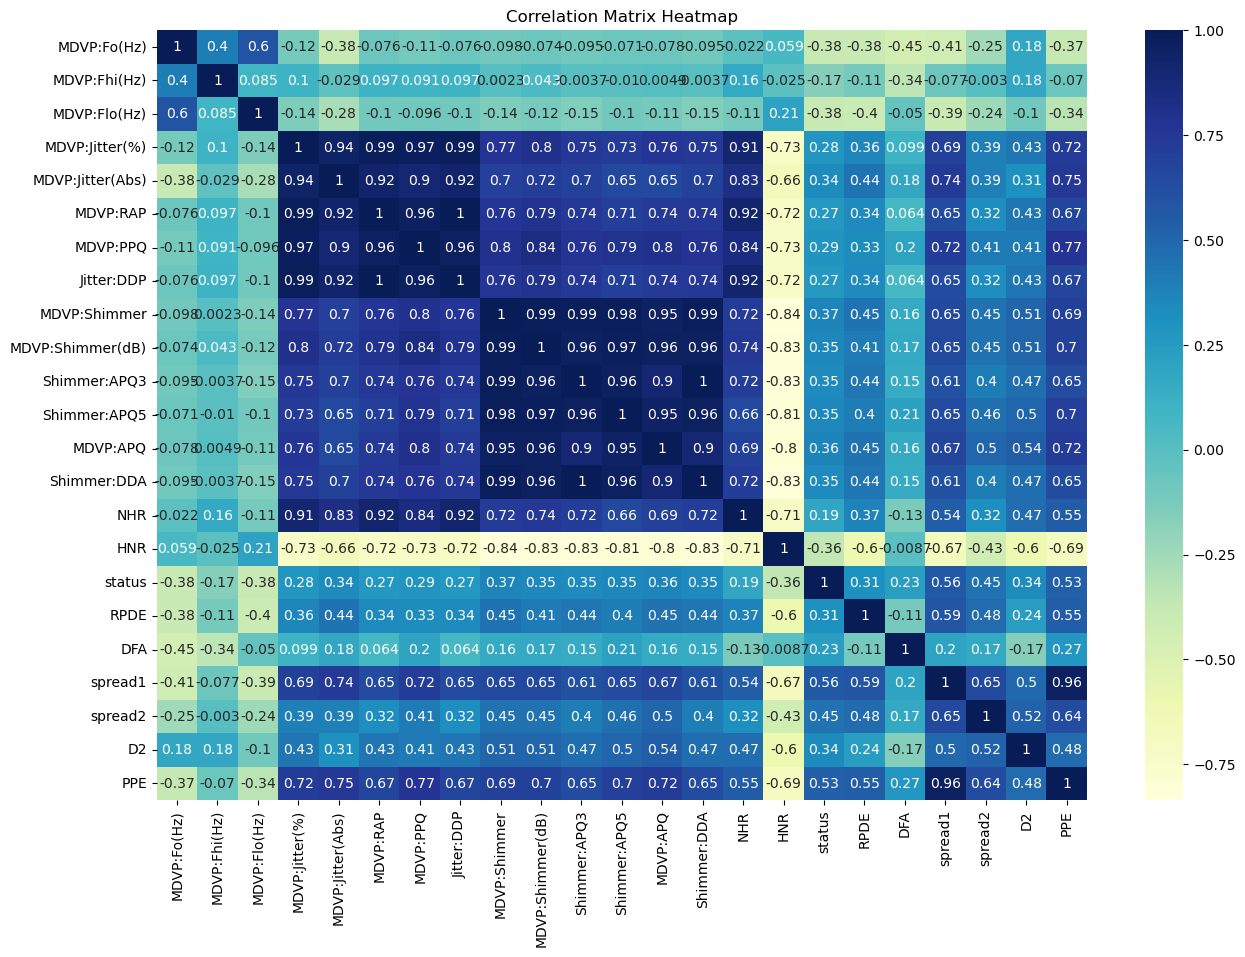

In [38]:
plt.figure(figsize=(15,10))
numerical_ds = ds.select_dtypes(include=np.number)
sns.heatmap(numerical_ds.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix Heatmap')
plt.show()

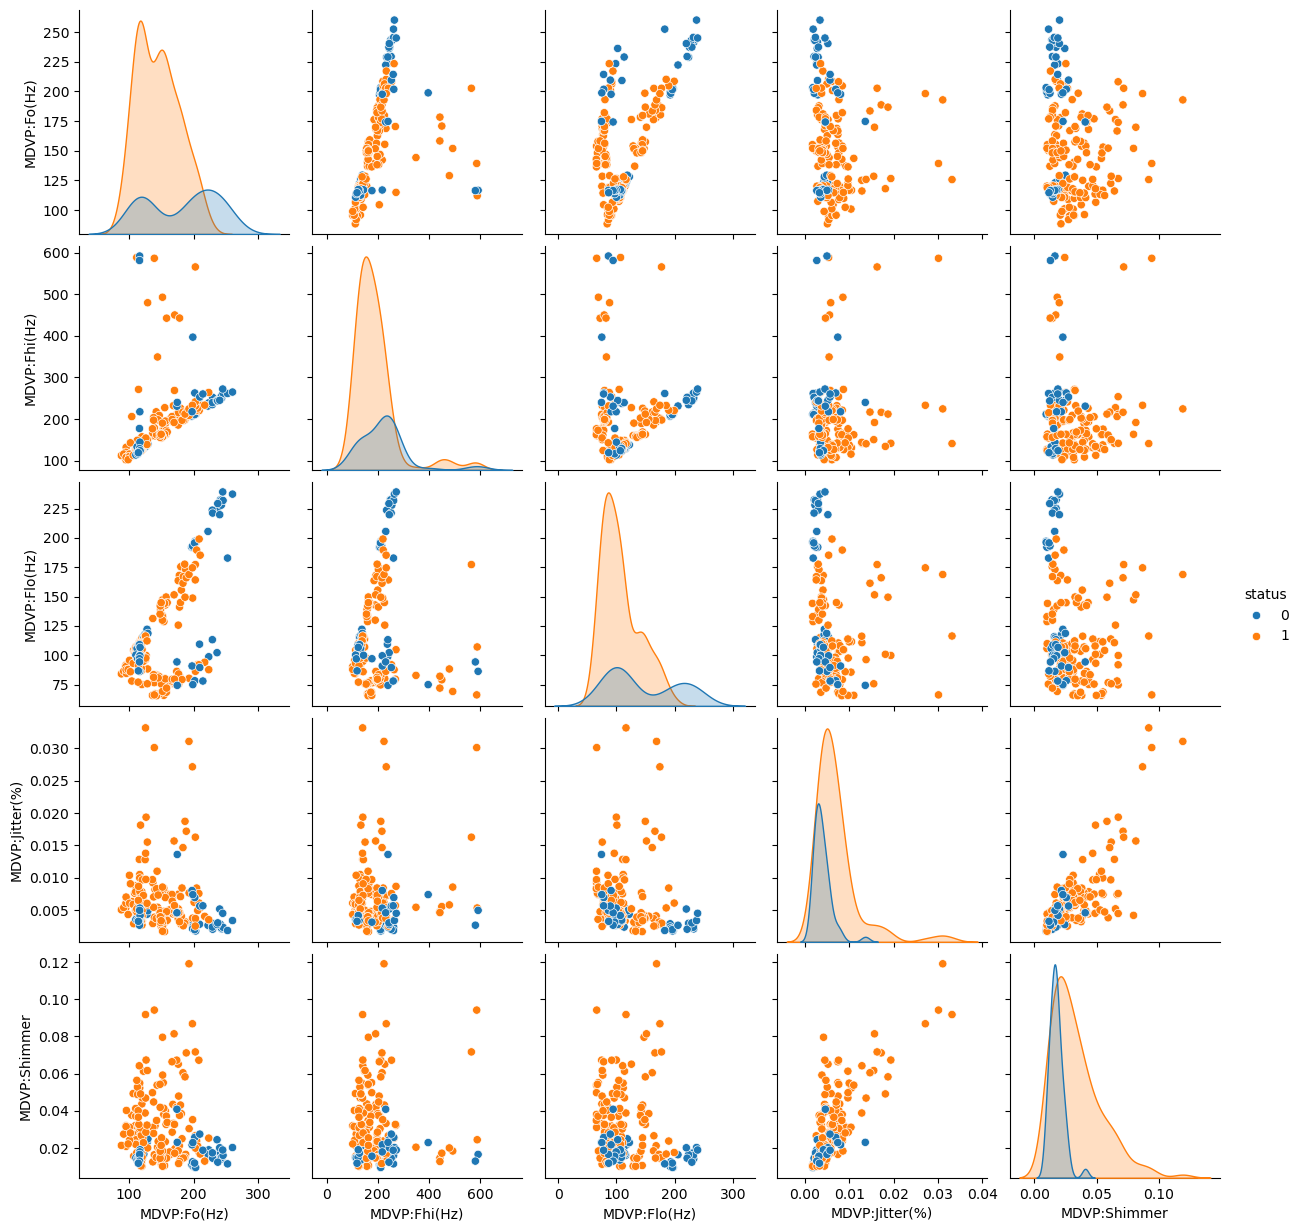

In [39]:
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer'] # Example features
sns.pairplot(ds[selected_features + ['status']], hue='status')
plt.show()

### ***Train & Test Model***

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(x_train.shape)
print(x_test.shape)

(156, 22)
(39, 22)


### ***Training***



> **Support Vector Machine**



In [41]:
mod = svm.SVC(kernel='linear')
mod.fit(x_train, y_train)

SVC(kernel='linear')

In [42]:
x_train_prediction = mod.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

x_test_prediction = mod.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of training data :  0.8717948717948718
Accuracy score of test data :  0.8974358974358975




> **Logistic Regression**



In [43]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_x_train_prediction = log_model.predict(x_train)
log_training_data_accuracy = accuracy_score(log_x_train_prediction, y_train)
log_x_test_prediction = log_model.predict(x_test)
log_test_data_accuracy = accuracy_score(log_x_test_prediction, y_test)

In [44]:
print('Logistic Regression Accuracy score of the training data : ', log_training_data_accuracy)
print('Logistic Regression Accuracy score of the test data : ', log_test_data_accuracy)

Logistic Regression Accuracy score of the training data :  0.8525641025641025
Logistic Regression Accuracy score of the test data :  0.8974358974358975




> **Decision Tree**



In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
dt_x_train_prediction = dt_classifier.predict(x_train)
dt_training_data_accuracy = accuracy_score(dt_x_train_prediction, y_train)
dt_x_test_prediction = dt_classifier.predict(x_test)
dt_test_data_accuracy = accuracy_score(dt_x_test_prediction, y_test)

In [46]:
print('Decision Tree Accuracy score of the training data : ', dt_training_data_accuracy)
print('Decision Tree Accuracy score of the test data : ', dt_test_data_accuracy)

Decision Tree Accuracy score of the training data :  1.0
Decision Tree Accuracy score of the test data :  0.9230769230769231




> **Random Forest**



In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

rf_x_train_prediction = rf_classifier.predict(x_train)
rf_training_data_accuracy = accuracy_score(rf_x_train_prediction, y_train)
rf_x_test_prediction = rf_classifier.predict(x_test)
rf_test_data_accuracy = accuracy_score(rf_x_test_prediction, y_test)

In [48]:
print('Random Forest Accuracy score of the training data : ', rf_training_data_accuracy)
print('Random Forest Accuracy score of the test data : ', rf_test_data_accuracy)

Random Forest Accuracy score of the training data :  1.0
Random Forest Accuracy score of the test data :  0.9230769230769231




> **Gradiant Boosting Method**




In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(x_train, y_train)

gb_x_train_prediction = gb_classifier.predict(x_train)
gb_training_data_accuracy = accuracy_score(gb_x_train_prediction, y_train)
gb_x_test_prediction = gb_classifier.predict(x_test)
gb_test_data_accuracy = accuracy_score(gb_x_test_prediction, y_test)

In [50]:
print('Gradient Boosting Accuracy score of the training data : ', gb_training_data_accuracy)
print('Gradient Boosting Accuracy score of the test data : ', gb_test_data_accuracy)

Gradient Boosting Accuracy score of the training data :  1.0
Gradient Boosting Accuracy score of the test data :  0.9230769230769231


### ***Evaluation***

In [51]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return cm, precision, recall, f1

svm_cm, svm_precision, svm_recall, svm_f1 = evaluate_model(mod, x_test, y_test)
print("SVM:")
print("Confusion Matrix:\n", svm_cm)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)

log_cm, log_precision, log_recall, log_f1 = evaluate_model(log_model, x_test, y_test)
print("\nLogistic Regression:")
print("Confusion Matrix:\n", log_cm)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1-score:", log_f1)

dt_cm, dt_precision, dt_recall, dt_f1 = evaluate_model(dt_classifier, x_test, y_test)
print("\nDecision Tree:")
print("Confusion Matrix:\n", dt_cm)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

rf_cm, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_classifier, x_test, y_test)
print("\nRandom Forest:")
print("Confusion Matrix:\n", rf_cm)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

gb_cm, gb_precision, gb_recall, gb_f1 = evaluate_model(gb_classifier, x_test, y_test)
print("\nGradint Boosting Method:")
print("Confusion Matrix:\n", gb_cm)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-score:", gb_f1)

SVM:
Confusion Matrix:
 [[ 6  4]
 [ 0 29]]
Precision: 0.8787878787878788
Recall: 1.0
F1-score: 0.9354838709677419

Logistic Regression:
Confusion Matrix:
 [[ 6  4]
 [ 0 29]]
Precision: 0.8787878787878788
Recall: 1.0
F1-score: 0.9354838709677419

Decision Tree:
Confusion Matrix:
 [[ 7  3]
 [ 0 29]]
Precision: 0.90625
Recall: 1.0
F1-score: 0.9508196721311475

Random Forest:
Confusion Matrix:
 [[ 7  3]
 [ 0 29]]
Precision: 0.90625
Recall: 1.0
F1-score: 0.9508196721311475

Gradint Boosting Method:
Confusion Matrix:
 [[ 7  3]
 [ 0 29]]
Precision: 0.90625
Recall: 1.0
F1-score: 0.9508196721311475




> **HyperParameter Tuning**



In [52]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

random_search.fit(x_train, y_train)
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_rf_classifier = random_search.best_estimator_
rf_x_test_prediction = best_rf_classifier.predict(x_test)
rf_test_data_accuracy = accuracy_score(rf_x_test_prediction, y_test)
print('Random Forest Accuracy score of the test data (after tuning): ', rf_test_data_accuracy)

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
Best score: 0.904233870967742
Random Forest Accuracy score of the test data (after tuning):  0.9230769230769231


### ***Predicting input***

In [53]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = best_rf_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")
else:
  print("The Person has Parkinsons")

[1]
The Person has Parkinsons


### ***Saving Model***

In [54]:
import pickle
filename = 'Parkinsons_model.sav'
pickle.dump(mod, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))